Javier Mencia Ledo 1008476114
(Late enrollment in the class)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Define the three probabilities 0.3, 0.5,0.7
true_probabilities = [0.3, 0.5, 0.7]


0


We have created our own data to work with, namely Theta A, Theta B and Theta C.
The data is synthetic

Final Guesses for Theta - [0.21656827 0.65600196 0.71689256]


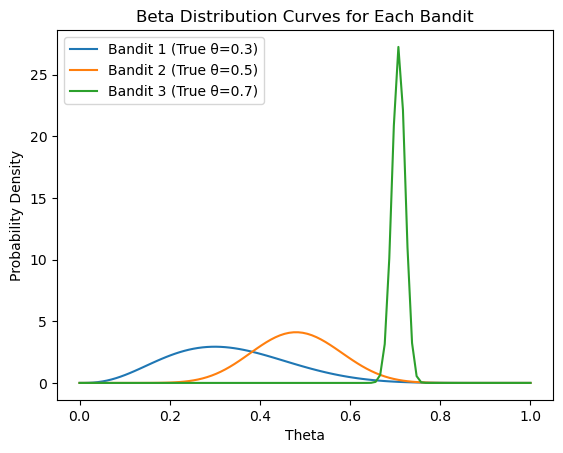

In [91]:
# Number of rounds to be played
num_rounds = 1000

# Initialize variables
successes = np.zeros(3)
failures = np.zeros(3)

# Lists to store parameters of the Beta distributions
beta_params = []

for round in range(num_rounds):
    # Sample from the beta distribution for each bandit
    samples = np.random.beta(successes + 1, failures + 1) #This is where we update the posterior
    # Choose the bandit with the highest sampled probability
    chosen_bandit = np.argmax(samples)
    
    # Simulate pulling the chosen bandit and observe the reward
    reward = stats.bernoulli(p=true_probabilities[chosen_bandit]).rvs(size=1)[0]
    # Update success and failure counts for the chosen bandit
    successes[chosen_bandit] += reward
    failures[chosen_bandit] += (1 - reward)
    
    # Append the parameters of the Beta distributions for plotting
    beta_params.append((successes + 1, failures + 1))
    
    
# Print the guessed theta values for each bandit
print(f"Final Guesses for Theta - {samples}")


# Plotting Beta distribution curves
x = np.linspace(0, 1, 100)
for i in range(num_bandits):
    plt.plot(x, stats.beta.pdf(x, beta_params[-1][0][i], beta_params[-1][1][i]), label=f'Bandit {i+1} (True θ={true_probabilities[i]})')


plt.title('Beta Distribution Curves for Each Bandit')
plt.xlabel('Theta')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


